In [1]:
#Imported libraries and packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
import torch
from ta import trend
import torch.nn as nn
from ta import momentum
import plotly.express as px
from termcolor import colored
import plotly.graph_objects as go
from ta import add_all_ta_features
from ta.volatility import BollingerBands
from plotly.subplots import make_subplots
print('Packages successfully imported...')

Packages successfully imported...


In [2]:
#Imported data from 2017-10-01 to 2021-07-07. Data downloaded from Yahoo

BTC = pd.read_csv('BTC-USD.csv')
BNB = pd.read_csv('BNB-USD.csv')
ADA = pd.read_csv('ADA-USD.csv')
LINK = pd.read_csv('LINK-USD.csv')

## Data set

In [3]:
#Every data set got a new column

BTC['Symbol'] = 'BTC'
BNB['Symbol'] = 'BNB'
ADA['Symbol'] = 'ADA'
LINK['Symbol'] = 'LINK'

#Merging tables
df_all=pd.concat([BTC,BNB,ADA,LINK], axis=0 )
df_all.head()

In [5]:
# found null values and fulfill

df_all.isnull().sum()
df_all.fillna(method='ffill', inplace=True, axis=0)
df_all.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [7]:
#Information about data set

df_all.shape, df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5504 entries, 0 to 1375
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5504 non-null   object 
 1   Open       5504 non-null   float64
 2   High       5504 non-null   float64
 3   Low        5504 non-null   float64
 4   Close      5504 non-null   float64
 5   Adj Close  5504 non-null   float64
 6   Volume     5504 non-null   float64
 7   Symbol     5504 non-null   object 
dtypes: float64(6), object(2)
memory usage: 387.0+ KB


((5504, 8), None)

In [8]:
#converte volume to million

df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all['Volume_Million']=df_all['Volume'] / 1000000000

In [9]:
#Closed price 

wide_format=df_all.groupby(['Date', 'Symbol'])['Close'].last().unstack()
wide_format.head()

Symbol           ADA      BNB          BTC      LINK
Date                                                
2017-10-01  0.024969  1.52653  4403.740234  0.436647
2017-10-02  0.025932  1.96467  4409.319824  0.356767
2017-10-03  0.020816  1.82070  4317.479980  0.345535
2017-10-04  0.021931  1.60148  4229.359863  0.397361
2017-10-05  0.021489  1.67849  4328.410156  0.406538

## Descriptive statistics


In [10]:
#Descriptive statistics

wide_format.describe()

Symbol          ADA          BNB           BTC         LINK
count   1376.000000  1376.000000   1376.000000  1376.000000
mean       0.256976    54.938471  13775.277842     6.362553
std        0.410651   117.793605  13602.447963     9.924840
min        0.018539     1.152570   3236.761719     0.145255
25%        0.045919    11.001864   6679.984741     0.431812
50%        0.087003    16.684370   8911.304199     1.929429
75%        0.184181    28.048613  11586.823242     8.074759
max        2.309113   675.684082  63503.457031    52.198696

# Transaction Volume in MIllion

Text(0.5, 0, 'Transaction Volume (in million)')

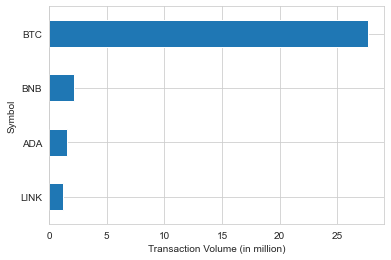

In [37]:
#Transaction Volume in MIllion

ax = df_all.groupby(['Symbol'])['Volume_Million'].last().sort_values(ascending=False).sort_values().plot(kind='barh');

ax.set_xlabel("Transaction Volume (in million)")


# Historical price of coins per unit


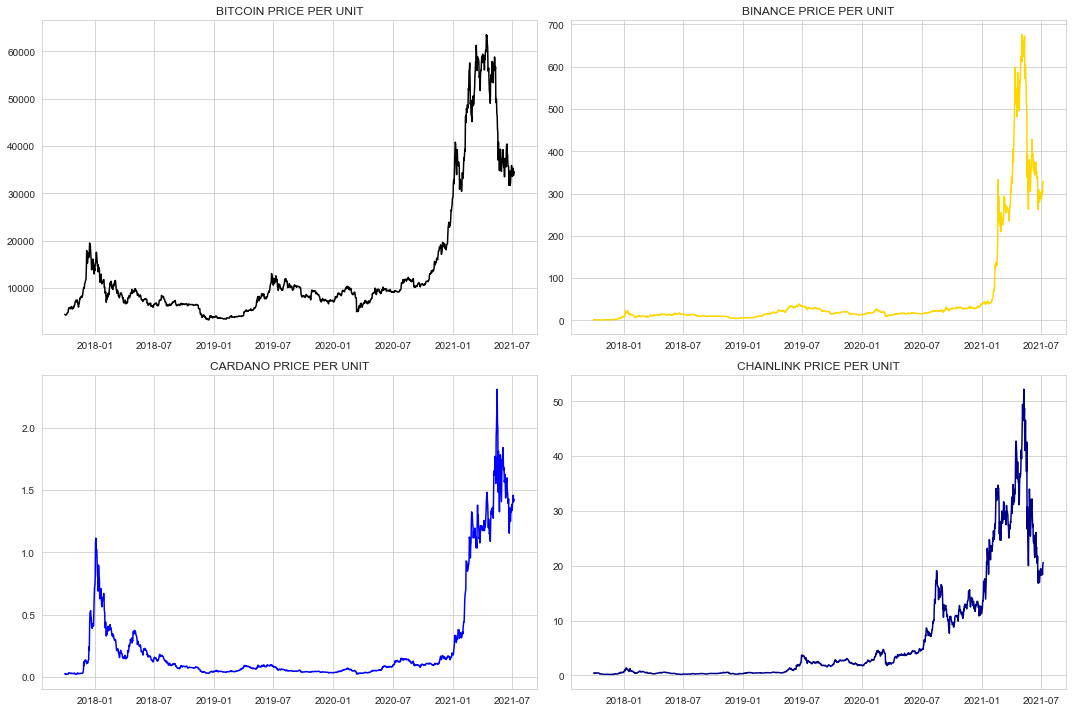

In [12]:
#Historical price of coins per unit

subplots=()

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 10))

ax1[0].plot(wide_format['BTC'], color='Black')
ax1[0].set_title('BITCOIN PRICE PER UNIT')

ax1[1].plot(wide_format['BNB'], color='gold')
ax1[1].set_title('BINANCE PRICE PER UNIT')

ax2[0].plot(wide_format['ADA'], color='Blue')
ax2[0].set_title('CARDANO PRICE PER UNIT')

ax2[1].plot(wide_format['LINK'], color='darkblue')
ax2[1].set_title('CHAINLINK PRICE PER UNIT')

plt.tight_layout()

Text(0.5, 1.0, 'Transaction Volumen per Currency')

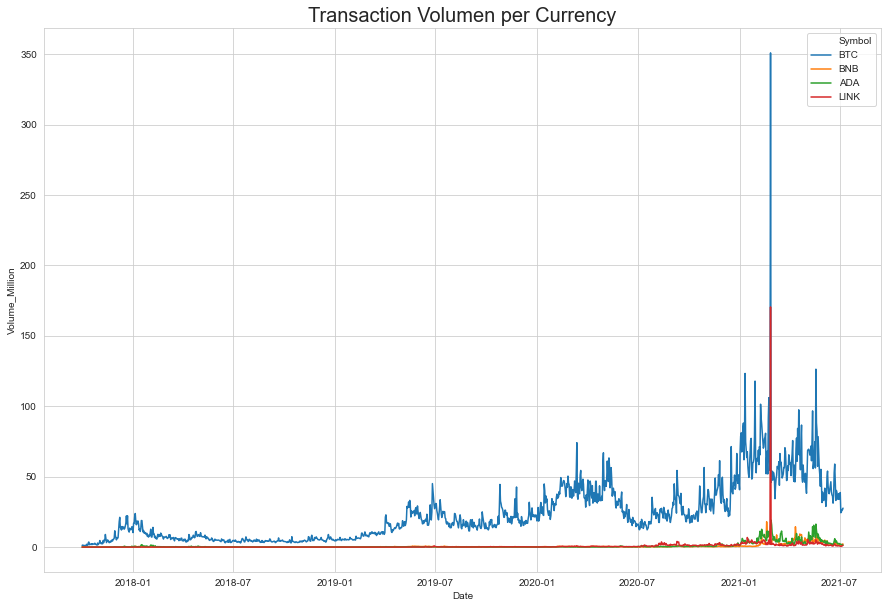

In [13]:
fig, ax1 = plt.subplots( figsize=(15, 10))
ax1=sns.lineplot(x='Date', y='Volume_Million', data=df_all, hue='Symbol')
ax1.set_title('Transaction Volumen per Currency', size=20)

# Drop - Recovery Analysis

## Drop Price Analysis

In [14]:

#max_btc = df_all[df_all['Symbol'] == 'BTC']['High'].max()
#print('Bitcoin max price: ', max_btc)

#print('-'*50)
#print('Date when BTC reach the highest price')

#date1_btc = df_all[df_all[df_all['Symbol'] == 'BTC']['High'] == max_btc]['Date'].iloc[0]
#print(date1_btc)
#print(df_all[df_all[df_all['Symbol'] == 'BTC']['High'] == max_btc]['Date'].iloc[0])
#print('-'*50)

#min_btc = df_all[(df_all['Date'] >= '2021-05-01') & (df_all['Date'] <= '2021-07-01') & (df_all['Symbol'] == 'BTC')]['Low'].min()
#print('Bitcoin min price: ', min_btc)
#print('-'*50)

#print('Date when Bitcoin drop lowest price in 2021')

#date2_btc = df_all[df_all[df_all['Symbol'] == 'BTC']['Low'] == min_btc]['Date'].iloc[0]
#print(date2_btc)
#print(df_all[df_all[df_all['Symbol'] == 'BTC']['Low'] == min_btc]['Date'].iloc[0])
#print('-'*50)


#Bitcoin price drop in 2021

#drop_btc = round((min_btc - max_btc)/max_btc,4) * 100
#print('Bitcoin  price drop in 2021: ', drop_btc, '%')
#print('Bitcoin  price drop in 2021: ', round((min_btc - max_btc)/max_btc,4) * 100, "%")


In [15]:
#BTC
max_btc = df_all[df_all['Symbol'] == 'BTC']['High'].max()
date1_btc = df_all[df_all[df_all['Symbol'] == 'BTC']['High'] == max_btc]['Date'].iloc[0]
min_btc = df_all[(df_all['Date'] >= '2021-05-01') & (df_all['Date'] <= '2021-07-01') & (df_all['Symbol'] == 'BTC')]['Low'].min()
date2_btc = df_all[df_all[df_all['Symbol'] == 'BTC']['Low'] == min_btc]['Date'].iloc[0]
drop_btc = round((min_btc - max_btc)/max_btc,4) * 100

#BNB
max_bnb = df_all[df_all['Symbol'] == 'BNB']['High'].max()
date1_bnb=df_all[df_all[df_all['Symbol'] == 'BNB']['High'] == max_bnb]['Date'].iloc[0]
min_bnb = df_all[(df_all['Date'] >= '2021-06-01') & (df_all['Date'] <= '2021-07-01') & (df_all['Symbol'] == 'BNB')]['Low'].min()
date2_bnb = df_all[df_all[df_all['Symbol'] == 'BNB']['Low'] == min_bnb]['Date'].iloc[0]
drop_bnb=round((min_bnb - max_bnb)/max_bnb,4) * 100


#ADA
max_ada = df_all[df_all['Symbol'] == 'ADA']['High'].max()
data1_ada = df_all[df_all[df_all['Symbol'] == 'ADA']['High'] == max_ada]['Date'].iloc[0]
min_ada = df_all[(df_all['Date'] >= '2021-05-01') & (df_all['Date'] <= '2021-07-01') & (df_all['Symbol'] == 'ADA')]['Low'].min()
data2_ada = df_all[df_all[df_all['Symbol'] == 'ADA']['Low'] == min_ada]['Date'].iloc[0]
drop_ada = round((min_ada - max_ada)/max_ada,4) * 100


#LINK
max_link = df_all[df_all['Symbol'] == 'LINK']['High'].max()
date1_link = df_all[df_all[df_all['Symbol'] == 'LINK']['High'] == max_link]['Date'].iloc[0]
min_link = df_all[(df_all['Date'] >= '2021-05-01') & (df_all['Date'] <= '2021-07-01') & (df_all['Symbol'] == 'LINK')]['Low'].min()
date2_link = df_all[df_all[df_all['Symbol'] == 'LINK']['Low'] == min_link]['Date'].iloc[0]
drop_link = round((min_link - max_link)/max_link,4) * 100

summary_drop = {"Symbol":['BTC','BNB','ADA','LINK'],
           "Max_price":[max_btc, max_bnb, max_ada, max_link], 
           "Min_price":[min_btc, min_bnb, min_ada, min_link ],
           "Date Highest":[date1_btc, date1_bnb, data1_ada, date1_link],
           "Date Lowest":[date2_btc, date2_bnb, data2_ada, date2_link], 
           "price_drop_%":[drop_btc,drop_bnb,drop_ada,drop_link]
          }

drop_summary=pd.DataFrame(summary_drop)
drop_summary

Symbol     Max_price     Min_price Date Highest Date Lowest  price_drop_%
0    BTC  64863.097656  28893.621094   2021-04-14  2021-06-22        -55.45
1    BNB    690.931946    226.297836   2021-05-10  2021-06-22        -67.25
2    ADA      2.461766      1.002985   2021-05-16  2021-06-22        -59.26
3   LINK     52.876087     15.032353   2021-05-10  2021-06-22        -71.57

## Recovery Price Analysis

In [16]:
today_price_btc = df_all[(df_all['Symbol'] == 'BTC') & (df_all['Date'] == '2021-07-06')]['High'].iloc[0]
today_price_bnb = df_all[(df_all['Symbol'] == 'BNB') & (df_all['Date'] == '2021-07-06')]['High'].iloc[0]
today_price_ada = df_all[(df_all['Symbol'] == 'ADA') & (df_all['Date'] == '2021-07-06')]['High'].iloc[0]
today_price_link = df_all[(df_all['Symbol'] == 'LINK') & (df_all['Date'] == '2021-07-06')]['High'].iloc[0]


recovery_btc=round((today_price_btc - min_btc)/ min_btc * 100,4)
recovery_bnb=round((today_price_bnb - min_bnb)/ min_bnb * 100,4)
recovery_ada=round((today_price_ada - min_ada)/ min_ada * 100,4)
recovery_link=round((today_price_link - min_link)/ min_link * 100,4)

today_date = '2021-07-06'



recovery_summary=pd.DataFrame({"Symbol":['BTC','BNB','ADA','LINK'],
           "Today price":[today_price_btc, today_price_bnb, today_price_ada, today_price_link], 
           "Min price":[min_btc, min_bnb, min_ada, min_link ],
           "Date today":[today_date,today_date,today_date,today_date],
           "Date min price":[date2_btc, date2_bnb, data2_ada, date2_link], 
           "price_recovery_%":[recovery_btc,recovery_bnb,recovery_ada,recovery_link]
          })

recovery_summary

Symbol   Today price     Min price  Date today Date min price  \
0    BTC  35038.535156  28893.621094  2021-07-06     2021-06-22   
1    BNB    321.520966    226.297836  2021-07-06     2021-06-22   
2    ADA      1.456887      1.002985  2021-07-06     2021-06-22   
3   LINK     20.240997     15.032353  2021-07-06     2021-06-22   

   price_recovery_%  
0           21.2674  
1           42.0787  
2           45.2551  
3           34.6496

Drop Price Analysis Conclusion: 

- Cardano (ADA) showed a strong potential for long-term and short-term investment. We can see that ADA has the best recovery rate and the lowest price drop.


# Trend Analysis per Year

### 2018

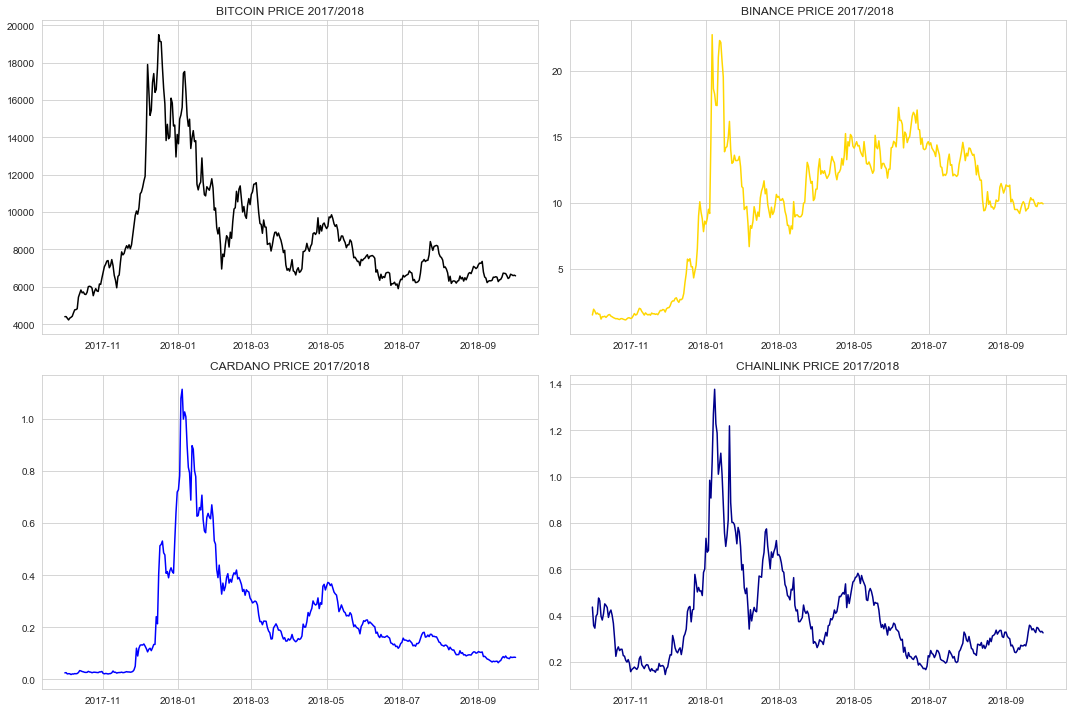

In [17]:
subplots=()

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 10))

ax1[0].plot(wide_format.loc['2017-10-01':'2018-10-01']['BTC'], color='Black')
ax1[0].set_title('BITCOIN PRICE 2017/2018')

ax1[1].plot(wide_format.loc['2017-10-01':'2018-10-01']['BNB'], color='gold')
ax1[1].set_title('BINANCE PRICE 2017/2018')

ax2[0].plot(wide_format.loc['2017-10-01':'2018-10-01']['ADA'], color='Blue')
ax2[0].set_title('CARDANO PRICE 2017/2018')

ax2[1].plot(wide_format.loc['2017-10-01':'2018-10-01']['LINK'], color='darkblue')
ax2[1].set_title('CHAINLINK PRICE 2017/2018')

plt.tight_layout()

### 2019

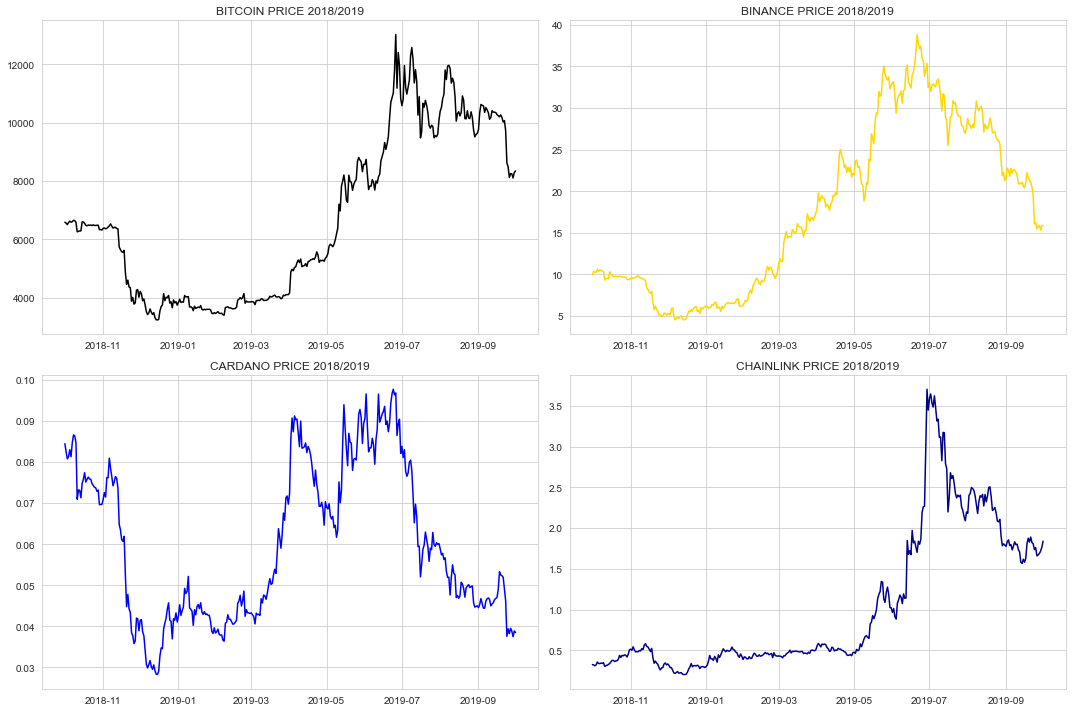

In [18]:
subplots=()

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 10))

ax1[0].plot(wide_format.loc['2018-10-01':'2019-10-01']['BTC'], color='Black')
ax1[0].set_title('BITCOIN PRICE 2018/2019')

ax1[1].plot(wide_format.loc['2018-10-01':'2019-10-01']['BNB'], color='gold')
ax1[1].set_title('BINANCE PRICE 2018/2019')

ax2[0].plot(wide_format.loc['2018-10-01':'2019-10-01']['ADA'], color='Blue')
ax2[0].set_title('CARDANO PRICE 2018/2019')

ax2[1].plot(wide_format.loc['2018-10-01':'2019-10-01']['LINK'], color='darkblue')
ax2[1].set_title('CHAINLINK PRICE 2018/2019')

plt.tight_layout()

### 2020 

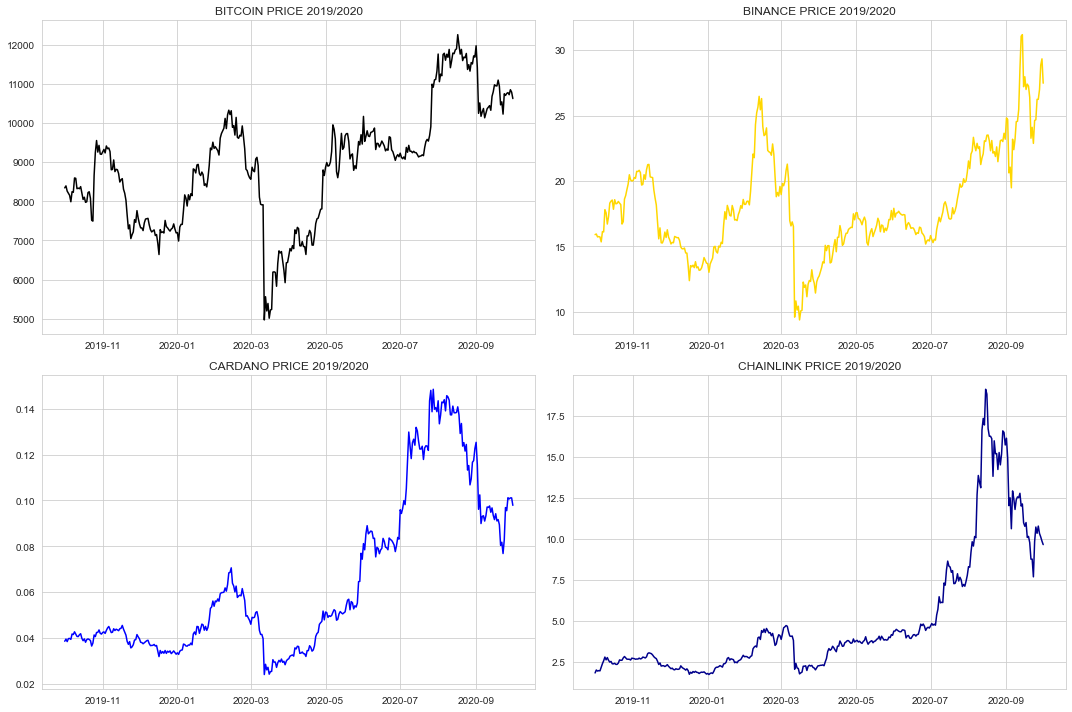

In [19]:
subplots=()

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 10))

ax1[0].plot(wide_format.loc['2019-10-01':'2020-10-01']['BTC'], color='Black')
ax1[0].set_title('BITCOIN PRICE 2019/2020')

ax1[1].plot(wide_format.loc['2019-10-01':'2020-10-01']['BNB'], color='gold')
ax1[1].set_title('BINANCE PRICE 2019/2020')

ax2[0].plot(wide_format.loc['2019-10-01':'2020-10-01']['ADA'], color='Blue')
ax2[0].set_title('CARDANO PRICE 2019/2020')

ax2[1].plot(wide_format.loc['2019-10-01':'2020-10-01']['LINK'], color='darkblue')
ax2[1].set_title('CHAINLINK PRICE 2019/2020')

plt.tight_layout()

### 2021

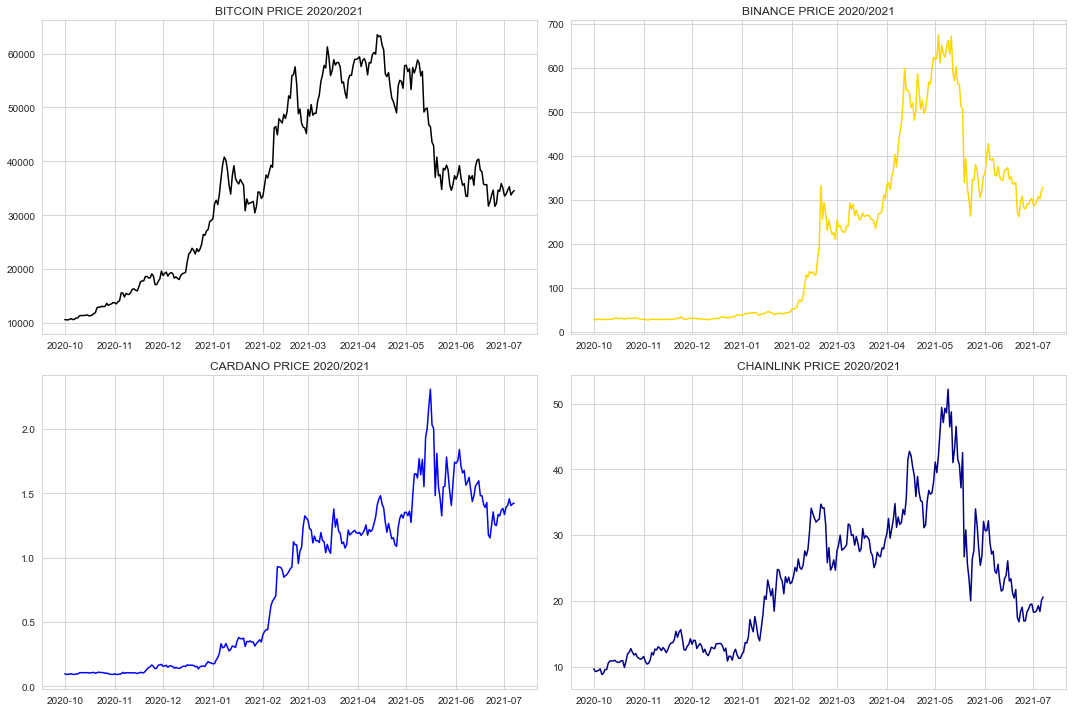

In [20]:
subplots=()

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 10))

ax1[0].plot(wide_format.loc['2020-10-01':]['BTC'], color='Black')
ax1[0].set_title('BITCOIN PRICE 2020/2021')

ax1[1].plot(wide_format.loc['2020-10-01':]['BNB'], color='gold')
ax1[1].set_title('BINANCE PRICE 2020/2021')

ax2[0].plot(wide_format.loc['2020-10-01':]['ADA'], color='Blue')
ax2[0].set_title('CARDANO PRICE 2020/2021')

ax2[1].plot(wide_format.loc['2020-10-01':]['LINK'], color='darkblue')
ax2[1].set_title('CHAINLINK PRICE 2020/2021')

plt.tight_layout()

# Coins Corelation

Correlation is a statistic that measures the degree to which two variables move in relation to each other.

In cryptocurrency, the correlation can measure the movement of a coin with that of a benchmark, such as the Bitcoin (BTC).

Correlation measures association, but doesn't show if x causes y or vice versa, or if the association is caused by a third–perhaps unseen–factor.

There is a significant correlation between coins: 
- BTC/ADA 0.86;
- BTC/BNB 0.86;
- BTC/LINK 0.93.

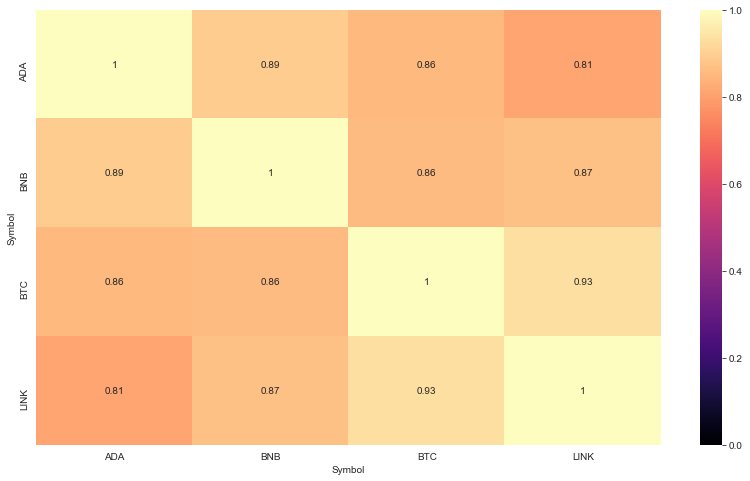

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(wide_format.corr(),vmin=0, vmax=1, cmap='magma', annot=True);

# Tehnical Analysis (Bitcoin)

In [22]:
BTC = pd.read_csv('/Users/djordjedubovina/Downloads/BTC-USD (1).csv')

In [23]:
BTC.set_index('Date', inplace=True)

In [24]:
BTC.isnull().sum()
BTC.fillna(method='ffill', inplace=True, axis=0)
BTC.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Data set

In [25]:
BTC.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

                Volume  
Date                    
2014-09-17  21056800.0  
2014-09-18  34483200.0  
2014-09-19  37919700.0  
2014-09-20  36863600.0  
2014-09-21  26580100.0

In [27]:
fig = go.Figure(data=[go.Candlestick(x=BTC.index,
                open=BTC['Open'],
                high=BTC['High'],
                low=BTC['Low'],
                close=BTC['Close'])], 
                layout = go.Layout({
                    'title':{
                    'text':'Bitcoin Daily Historical data',
                    'font':{
                        'size':25
                            }
                        }
                    })
               )


fig.update_layout({"template":"plotly_dark"})
fig.show()

## Moving Average


Moving average cuts down the noise in the price chart. The direction of the MA might give an idea of the trend of the chart. A subtle observation can be made from the plot that is whenever the candlestick cuts the MA threshold level to rise above it, the price is likely to go high for some duration of time before which there's a change in direction of price to due to other factors. In the same way, when the candlestick cuts the MA threshold level to rise below it, the price is likely to fall for some duration. At the rising cut-point, a trader can enter the market and at the falling cut-point, a trader might sell. This is also called as a crossover.

In [28]:
average_20 = BTC.Close.rolling(window=20, min_periods=1).mean()
average_50 = BTC.Close.rolling(window=50, min_periods=1).mean()
average_100 = BTC.Close.rolling(window=100, min_periods=1).mean()
average_200 = BTC.Close.rolling(window=200, min_periods=1).mean()


set_1 = {
    'x':BTC.index,
    'open': BTC.Open,
    'close':BTC.Close,
    'high':BTC.High,
    'low':BTC.Low,
    'type':'candlestick'
}



set_2 = {
    'x':BTC.index,
    'y':average_20,
    'type':'scatter',
    'mode':'lines',
    'line':{
        'width':2,
        'color':'yellow'
    },
    'name':'MA of 20 days'
}


set_3 = {
    'x':BTC.index,
    'y':average_50,
    'type':'scatter',
    'mode':'lines',
    'line':{
        'width':2,
        'color':'green'
    },
    'name':'MA of 50 days'
}



set_4 = {
    'x':BTC.index,
    'y':average_100,
    'type':'scatter',
    'mode':'lines',
    'line':{
        'width':2,
        'color':'blue'
    },
    'name':'MA of 100 days'
}


set_5 = {
    'x':BTC.index,
    'y':average_200,
    'type':'scatter',
    'mode':'lines',
    'line':{
        'width':2,
        'color':'red'
    },
    'name':'MA of 200 days'
}



data = [set_1, set_2, set_3, set_4, set_5]

layout = go.Layout({
    'title':{
        'text':'Moving averages',
        'font':{
            'size':25
        }
    }
})

fig = go.Figure(data=data, layout=layout)
fig.update_layout({"template":"plotly_dark"})
fig.show()

The inferences from the above MA charts: 

Every time the asset price comes down to MA(50), it changes direction which concludes that MA(50) provides good support and maybe contains lots of potential buying points.

Every time there's a crossover from high to low at MA(20), the price goes bearish which shows that there are a lot of consecutive selling points on MA(20).

Each time MA (50) and MA (200) cross on the chart, create a death cross. 
The death cross is a technical chart pattern indicating the potential for a major sell-off. Typically, the most common moving averages used in this pattern are the 50-day and 200-day moving averages.

## Average True Range 



The true range indicator is taken as the greatest of the following: 
- current high less the current low; 
- the absolute value of the current high less the previous close;  
- the absolute value of the current low less the previous close. 

The ATR is then a moving average, generally using 14 days, of the true ranges. Simply put, a stock experiencing a high level of volatility has a higher ATR, and a low volatility stock has a lower ATR.

In [29]:
high_low = BTC['High'] - BTC['Low']
high_close = np.abs(BTC['High'] - BTC['Close'].shift())
low_close = np.abs(BTC['Low'] - BTC['Close'].shift())

ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)

atr = true_range.rolling(14).sum()/14

atr_daily = BTC
atr_daily['atr'] = atr

atr_daily['High_atr'] = atr_daily['High'] + atr_daily['atr']
atr_daily['Low_atr'] = atr_daily['Low'] - atr_daily['atr']

fig = make_subplots(rows=2, cols=1, row_heights=[0.5, 0.5], vertical_spacing=.3, subplot_titles=["Bitcoin Daily Data", "Average True Range"])

fig.append_trace(go.Candlestick(x=BTC.index,
                open=atr_daily['Open'],
                high=atr_daily['High'],
                low=atr_daily['Low'],
                close=atr_daily['Close']),
                row=1,col=1)

fig.append_trace(go.Scatter(x=atr_daily.index,
                           y=atr_daily.atr,
                            line_color='Orange'
            ),row=2,col=1)



fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    
)
fig.update_layout({"template":"plotly_dark"})


fig.show()

## ATR Significance


Though ATR doesn't give much of an idea about the trend of the chart, but it can be used by traders to put stop losses. An ATR value above close or high can be used as a potential exit point. An ATR value below open or low can be used as a potential exit point as well in case of down fall of the price.

In [30]:
set_1 = go.Candlestick(x=BTC.index,
                open=atr_daily['Open'],
                high=atr_daily['High'],
                low=atr_daily['Low'],
                close=atr_daily['Close'])


set_2 = go.Scatter(x=atr_daily.index,
        y=atr_daily.High_atr,
        line_color='Orange')


set_3 = go.Scatter(x=atr_daily.index,
        y=atr_daily.Low_atr,
        line_color='Yellow')


data1 = [set_1, set_2, set_3]

layout = go.Layout({
    'title':{
        'text':'Upper/Lower limit of ATR values for trading',
        'font':{
            'size':25
        }
    }
})

fig = go.Figure(data=data1, layout=layout)
fig.update_layout({"template":"plotly_dark"})
fig.show()


In [31]:
#BTC[(BTC['Date'] >= '2014-09-17') & (BTC['Date'] <= '2014-12-31')]['Close'].min())

min_2014=BTC.loc['2014-09-17':'2014-12-31']['Low'].min()
max_2014=BTC.loc['2014-09-17':'2014-12-31']['High'].max()

min_2015=BTC.loc['2015-01-01':'2015-12-31']['Low'].min()
max_2015=BTC.loc['2015-01-01':'2015-12-31']['High'].max()

min_2016=BTC.loc['2016-01-01':'2016-12-31']['Low'].min()
max_2016=BTC.loc['2016-01-01':'2016-12-31']['High'].max()

min_2017=BTC.loc['2017-01-01':'2017-12-31']['Low'].min()
max_2017=BTC.loc['2017-01-01':'2017-12-31']['High'].max()

min_2018=BTC.loc['2018-01-01':'2018-12-31']['Low'].min()
max_2018=BTC.loc['2018-01-01':'2018-12-31']['High'].max()

min_2019=BTC.loc['2019-01-01':'2019-12-31']['Low'].min()
max_2019=BTC.loc['2019-01-01':'2019-12-31']['High'].max()

min_2020=BTC.loc['2020-01-01':'2020-12-31']['Low'].min()
max_2020=BTC.loc['2020-01-01':'2020-12-31']['High'].max()

min_2021=BTC.loc['2021-01-01':'2022-12-31']['Low'].min()
max_2021=BTC.loc['2021-01-01':'2022-12-31']['High'].max()

### Bitcoin min and max price in every year

In [36]:
min_max = {"year":[2014,2015,2016,2017,2018,2019,2020,2021],
           "min_price":[min_2014,min_2015,min_2016,min_2017,min_2018,min_2019,min_2020,min_2021],
           "max_price":[max_2014, max_2015, max_2016, max_2017, max_2018, max_2019, max_2020, max_2021] 
          }

min_max_price = pd.DataFrame(min_max)

In [33]:
min_max_price['percentage of growth']=(min_max_price['max_price'] - min_max_price['min_price']) / min_max_price['min_price'] * 100 

In [34]:
min_max_price

year     min_price     max_price  percentage of growth
0  2014    289.295990    468.174011             61.832181
1  2015    171.509995    495.562012            188.940602
2  2016    354.914001    979.396973            175.953321
3  2017    755.755981  20089.000000           2558.133115
4  2018   3191.303467  17712.400391            455.020874
5  2019   3391.023682  13796.489258            306.853226
6  2020   4106.980957  29244.876953            612.077247
7  2021  28722.755859  64863.097656            125.824771

### In the future analysis, it would be interesting:

- Explore the daily returns of coins from launch to present;
- Explore technical analysis for more than one coin;
- Explore market capitalization data;
- Explore technical analysis for one-minute prices;
- Compare top 100 currencies;
- Predict trend;
- Find the best group of coins with the highest returns.  

In [35]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')